#### Importing Libs

In [9]:
import os, sys
from dotenv import load_dotenv
import pandas as pd
import re
sys.path.insert(1, '..\classes')
from PlottingData import PlotData as pltd
from ProcessingData import ProcessData as proc

#### Enviroment Vars

In [2]:
load_dotenv()
RAW_DATA_PATH = os.getenv('RAW_DATA_PATH')
PROCESSED_DATA_PATH = os.getenv('PROCESSED_DATA_PATH')

#### Instance objects

In [3]:
plotter = pltd()
processor = proc()

#### Load data

In [4]:
df_tmp = pd.read_csv(RAW_DATA_PATH+'train_data.csv')
df_tmp.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#### Process data

In [5]:
df_tmp['cleaned_text'] = processor.remove_URLs(df_tmp['text'])
df_tmp['cleaned_text'] = processor.remove_HTMLs(df_tmp['cleaned_text'])
df_tmp['cleaned_text'] = processor.clean_non_ascii_chars(df_tmp['cleaned_text'])
df_tmp['cleaned_text'] = processor.remove_emojis(df_tmp['cleaned_text'])
df_tmp['cleaned_text'] = processor.remove_punctuation(df_tmp['cleaned_text'])
df_tmp['cleaned_text'] = processor.remove_stopwords(df_tmp['cleaned_text'])

#### AED

* Primeiro olhamos para a contagem entre tweets rotulados como desastres e como não desastres.

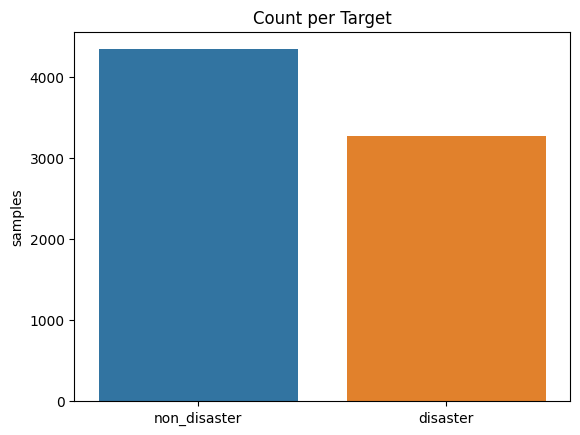

In [6]:
plotter.plotting_target_balance(
    data=df_tmp, 
    column_target='target', 
    dict_map_classes={
        0:'non_disaster',
        1:'disaster'})

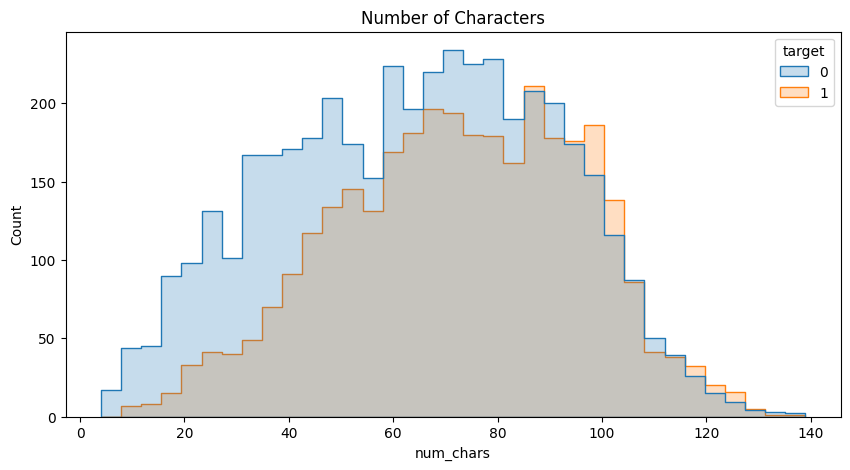

In [7]:
plotter.plotting_num_char_per_text(df_tmp, 'cleaned_text')

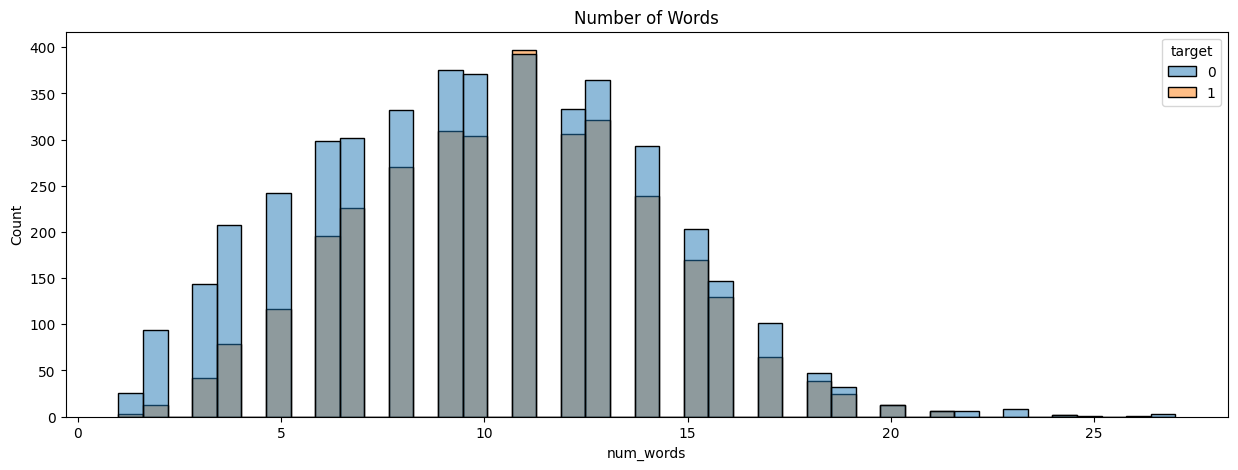

In [8]:
plotter.plotting_number_of_words(df_tmp, 'cleaned_text')

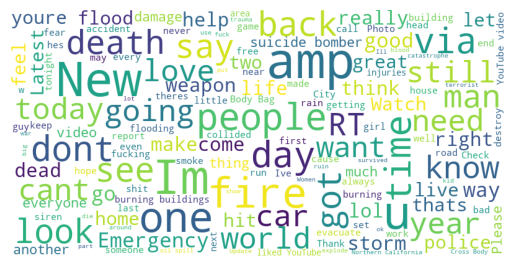

In [9]:
plotter.plot_wordcloud(df_tmp, 'cleaned_text', 'target')